In [2]:
!python -m pip install rebound

# Librerías y Paquetes

In [3]:
import rebound
import numpy as np

# Creación de Simulación

In [4]:
sim=rebound.Simulation()
sim.units=('AU','yr','Msun')

In [13]:
sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')
sim.add("Sun", hash = 'Sun')
sim.add("399", hash='tierra')
sim.add("301", hash='luna') 
sim.move_to_com()


Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '301'... 
Found: Moon (301) 


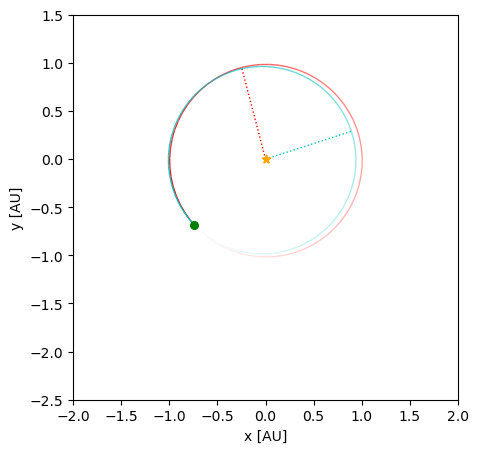

In [6]:
op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True, xlim=[-2,2], ylim=[-2.5,1.5])
op.fig.gca().get_children()[1].set_color('orange')
op.fig.gca().get_children()[2].set_color('green') 

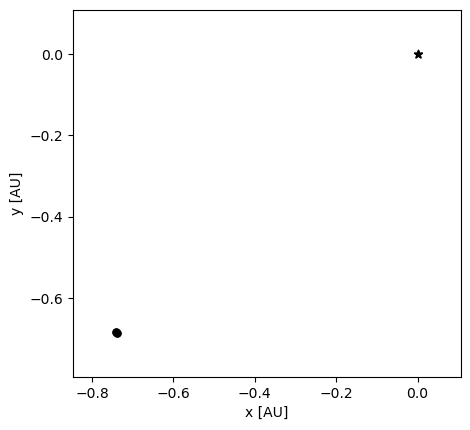

In [7]:
op = rebound.OrbitPlot(sim, unitlabel="[AU]", orbit_style=None, color=True)

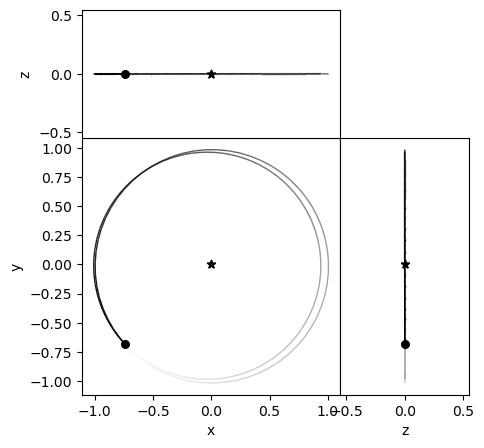

In [8]:
ops = rebound.OrbitPlotSet(sim)


## Propiedades Partículas de la Simulación

In [9]:
p=sim.particles[0]
print("Sol: ",p)

p=sim.particles[1]
print("Tierra: ", p)

p=sim.particles[2]
print("Luna: ", p)

Sol:  <rebound.particle.Particle object at 0x72c4d08e7cc0, m=0.9999999999950272 x=2.2530036310284413e-06 y=2.0778431097795425e-06 z=-1.2942665499450848e-10 vx=-1.2642305972396933e-05 vy=1.41167500630748e-05 vz=-7.177383963110685e-10>
Tierra:  <rebound.particle.Particle object at 0x72c4d08e78c0, m=3.0034896154502038e-06 x=-0.7410405593268883 y=-0.6833898066430554 z=4.44310005500044e-05 vx=4.156863608708099 vy=-4.64544881929571 vz=4.8446248039395084e-05>
Luna:  <rebound.particle.Particle object at 0x72c4d08e7cc0, m=3.694303350091508e-08 x=-0.7388674903991865 y=-0.6845383233476159 z=-0.00010885391300640931 vx=4.255451592308434 vy=-4.4444854573354196 vz=0.015489539953501733>


In [10]:
print("Masa Sol: ",sim.particles[0].m ,"Masas Solares")
print("Masa Tierra: ", sim.particles[1].m)
print("Masa Luna: ", sim.particles[2].m)
print()
print("Coordenadas Sol: ", sim.particles[0].x , sim.particles[0].y , sim.particles[0].z)
print("Coordenadas Tierra: ", sim.particles[1].x , sim.particles[1].y , sim.particles[1].z)
print("Coordenadas Luna: ", sim.particles[2].x , sim.particles[2].y, sim.particles[2].z)

Masa Sol:  0.9999999999950272 Masas Solares
Masa Tierra:  3.0034896154502038e-06
Masa Luna:  3.694303350091508e-08

Coordenadas Sol:  2.2530036310284413e-06 2.0778431097795425e-06 -1.2942665499450848e-10
Coordenadas Tierra:  -0.7410405593268883 -0.6833898066430554 4.44310005500044e-05
Coordenadas Luna:  -0.7388674903991865 -0.6845383233476159 -0.00010885391300640931


# Órbitas

In [11]:
orbits = sim.orbits()
for orbit in orbits:
    print(orbit)

<rebound.Orbit instance, a=1.0003437251736556 e=0.016861518789975667 inc=4.464623143164625e-05 Omega=2.475708943330082 omega=5.633662683589566 f=2.060353727367696>
<rebound.Orbit instance, a=0.9741508970846191 e=0.03771899455099624 inc=0.0025181787763513945 Omega=-2.351414478528908 omega=2.664553142330364 f=3.5757021046886766>


In [12]:
print("Órbita Luna (respecto a la Tierra):",sim.particles[1].orbit(primary=sim.particles[2]))
print("órbita Tierra (respecto al Sol): ", sim.particles[0].orbit(primary=sim.particles[1]))

Órbita Luna (respecto a la Tierra): <rebound.Orbit instance, a=0.0025466011810917973 e=0.047531407548314746 inc=0.09137563963358632 Omega=0.2623767111610893 omega=3.2305426126917847 f=5.443568992421634>
órbita Tierra (respecto al Sol):  <rebound.Orbit instance, a=1.0003437251736556 e=0.016861518789975667 inc=4.464623143164625e-05 Omega=2.475708943330082 omega=2.4920700299997733 f=2.060353727367696>


## Cálculo Fechas Eclipses

In [20]:
time = np.linspace(-1, 3, 1000000)
eclipses = []
tipos_de_eclipses = []
producto_cruz = []
Solar = []
Lunar = []
fech=[]
distancias_TL = []
distancias_TL2 = []

Solar_total = []
Solar_anular = []
Solar_parcial=[]

for i in time:
    sim.integrate(i)
    posicion_tierra = np.array(sim.particles['tierra'].xyz)
    posicion_luna = np.array(sim.particles['luna'].xyz)

    vector_tierra = posicion_tierra - np.array(sim.particles['Sun'].xyz)
    vector_luna = posicion_luna - np.array(sim.particles['Sun'].xyz)

    distancia_tierra = np.linalg.norm(vector_tierra)
    distancia_luna = np.linalg.norm(vector_luna)

    distancia_tierra_luna = np.linalg.norm(vector_tierra-vector_luna)

    producto = np.linalg.norm(np.cross(vector_tierra, vector_luna))
    producto_cruz.append(producto)

    tipo_eclipse = "no eclipse"

    if abs(producto) < 5.6e-5 :
        if distancia_tierra > distancia_luna:
            tipo_eclipse = "Solar"
            Solar.append(producto)
            fech.append(i)
            distancias_TL.append(distancia_tierra_luna)
            
        elif distancia_tierra < distancia_luna:
            tipo_eclipse = "Lunar"
            Lunar.append(producto)
            distancias_TL2.append(distancia_tierra_luna)

        if tipo_eclipse != "no eclipse":
            eclipse_datetime = datetime.today() + timedelta(days=i * 365.25)
            eclipse_date = eclipse_datetime.date()
            if eclipse_date not in tipos_de_eclipses:
                tipos_de_eclipses.append(eclipse_date)
                print(f"{eclipse_date.strftime('%Y-%m-%d')}: {tipo_eclipse}")

2023-05-05: Lunar
2023-10-14: Solar
2023-10-28: Lunar
2024-03-25: Lunar
2024-04-08: Solar
2024-09-17: Lunar
2024-09-18: Lunar
2024-10-02: Solar
2025-03-14: Lunar
2025-03-29: Solar
2025-09-07: Lunar
2025-09-21: Solar
2026-02-17: Solar
2026-03-03: Lunar
2026-08-12: Solar
2026-08-27: Lunar
2026-08-28: Lunar
2027-02-06: Solar
2027-02-20: Lunar


## Diferenciación de Eclipses

In [21]:
print("Distancia Mínima Tierra-Luna en Eclipse Solar: ",min(distancias_TL))
print("Promedio Distancia Tierra-Luna en Eclipse Solar: ",np.mean(distancias_TL))
print("Distancia Máxima Tierra-Luna en Eclipse Solar: ", max(distancias_TL))
print()
print("Distancia Mínima Tierra-Luna en Eclipse Lunar: ",min(distancias_TL2))
print("Promedio Distancia Tierra-Luna en Eclipse Lunar: ",np.mean(distancias_TL2))
print("Distancia Máxima Tierra-Luna en Eclipse Lunar: ", max(distancias_TL2))


Distancia Mínima Tierra-Luna en Eclipse Solar:  0.002397215746232024
Promedio Distancia Tierra-Luna en Eclipse Solar:  0.0025835701597231348
Distancia Máxima Tierra-Luna en Eclipse Solar:  0.0027173908328632984

Distancia Mínima Tierra-Luna en Eclipse Lunar:  0.0023892638237303773
Promedio Distancia Tierra-Luna en Eclipse Lunar:  0.002550129894732476
Distancia Máxima Tierra-Luna en Eclipse Lunar:  0.0027102809585050317


In [22]:
time = np.linspace(-1, 3, 1000000)
eclipses = []
tipos_de_eclipses = []
producto_cruz = []
Solar = []
Lunar = []
fech=[]
distancias_TL = []
distancias_TL2 = []
for i in time:
    sim.integrate(i)
    posicion_tierra = np.array(sim.particles['tierra'].xyz)
    posicion_luna = np.array(sim.particles['luna'].xyz)

    vector_tierra = posicion_tierra - np.array(sim.particles['Sun'].xyz)
    vector_luna = posicion_luna - np.array(sim.particles['Sun'].xyz)

    distancia_tierra = np.linalg.norm(vector_tierra)
    distancia_luna = np.linalg.norm(vector_luna)

    distancia_tierra_luna = np.linalg.norm(vector_tierra-vector_luna)

    producto = np.linalg.norm(np.cross(vector_tierra, vector_luna))
    producto_cruz.append(producto)

    tipo_eclipse = "no eclipse"
    tipo_solar = []
    tipo_lunar = []
    if abs(producto) < 5.6e-5 :
        if distancia_tierra > distancia_luna:
            tipo_eclipse = "Solar"
            Solar.append(producto)
            fech.append(i)
            distancias_TL.append(distancia_tierra_luna)
            tipo_solarr = "no sé"
            if distancia_tierra_luna in distancias_TL:
                if distancia_tierra_luna < 0.002583500392228106 :
                    tipo_solarr = "Total"
                    tipo_solar.append(tipo_solarr)
                if   0.002583500392228106 <= distancia_tierra_luna < 0.0027:
                    tipo_solarr = "Anular"
                    tipo_solar.append(tipo_solarr)
                else: 
                    Solar_parcial.append(distancia_tierra_luna)
                    tipo_solarr = "Parcial"
                    tipo_solar.append(tipo_solarr)
        
            
        elif distancia_tierra < distancia_luna:
            tipo_eclipse = "Lunar"
            Lunar.append(producto)
            distancias_TL2.append(distancia_tierra_luna)
        if tipo_eclipse == "Solar":
            eclipse_datetime = datetime.today() + timedelta(days=i * 365.25)
            eclipse_date = eclipse_datetime.date()
            if eclipse_date not in tipos_de_eclipses:
                tipos_de_eclipses.append(eclipse_date)
                print(f"{eclipse_date.strftime('%Y-%m-%d')}: {tipo_eclipse}:{tipo_solar}")
        if tipo_eclipse == "Lunar":
            eclipse_datetime = datetime.today() + timedelta(days=i * 365.25)
            eclipse_date = eclipse_datetime.date()
            if eclipse_date not in tipos_de_eclipses:
                tipos_de_eclipses.append(eclipse_date)
                print(f"{eclipse_date.strftime('%Y-%m-%d')}: {tipo_eclipse}")
        

2023-05-05: Lunar
2023-10-14: Solar:['Anular']
2023-10-28: Lunar
2024-03-25: Lunar
2024-04-08: Solar:['Total', 'Parcial']
2024-09-17: Lunar
2024-09-18: Lunar
2024-10-02: Solar:['Parcial']
2025-03-14: Lunar
2025-03-29: Solar:['Total', 'Parcial']
2025-09-07: Lunar
2025-09-21: Solar:['Anular']
2026-02-17: Solar:['Total', 'Parcial']
2026-03-03: Lunar
2026-08-12: Solar:['Total', 'Parcial']
2026-08-27: Lunar
2026-08-28: Lunar
2027-02-06: Solar:['Anular']
2027-02-20: Lunar
